In [5]:
data = read.csv('housing.data.txt',sep = '',header = FALSE)

   1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [77]:
install.packages('bbemkr')
library('bbemkr')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: MASS


In [81]:
X<-data$V6
y<-data$V14

The following objects are masked _by_ .GlobalEnv:

    data, y

The following objects are masked from spline (pos = 3):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects are masked from spline (pos = 4):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects are masked from spline (pos = 5):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects are masked from spline (pos = 6):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects are masked from spline (pos = 7):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects are masked from spline (pos = 8):

    call, crit, cv.crit, data, df, fit, iparms, lambda, lev, pen.crit,
    spar, w, x, y, yin

The following objects ar

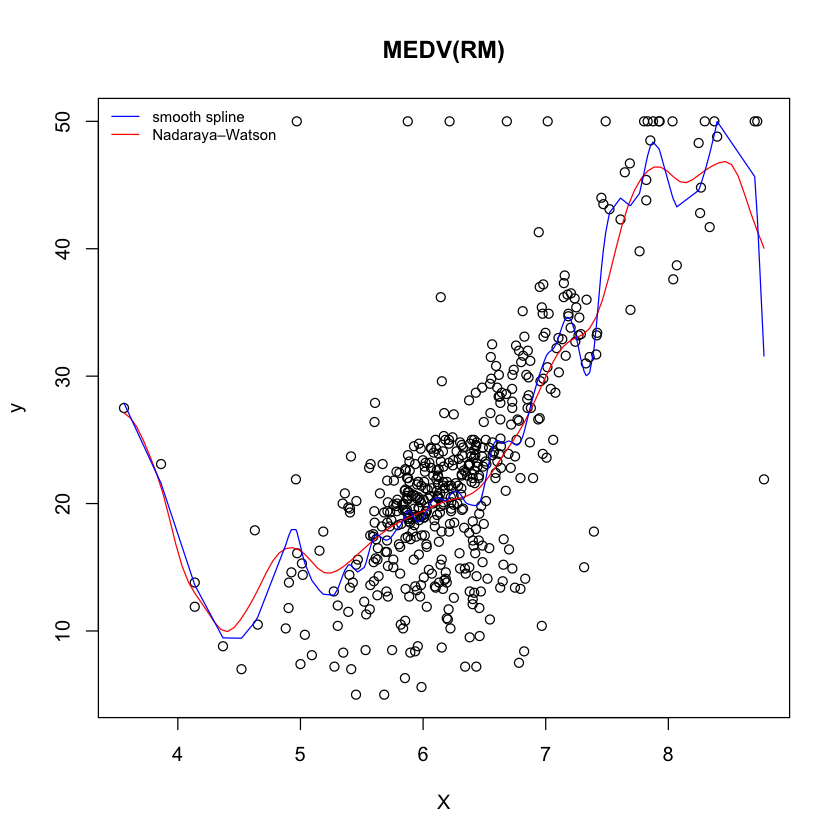

In [94]:
require(graphics)

attach(spline)
plot(X, y, main = "MEDV(RM)")
nadwat <- NadarayaWatsonkernel(X, y, h=h.ucv(X)$h, 
                                   gridpoint = seq(min(X), max(X), length.out = 100))
lines(nadwat$gridpoint, nadwat$mh, col = "red")
spline.spl <- smooth.spline(X, y)
lines(spline.spl, col = "blue")
legend('topleft', c('smooth spline','Nadaraya–Watson'), 
   lty=1, col=c('blue', 'red', 'green'), bty='n', cex=.75)
detach()

$SS(h) = \sum (Y_i - m(X_i))^2 + h \int_{X_{(1)}}^{X_{(n)}} [m^{''}(x)]^2 dx \to \min_m$

второе слагаемое в сглаживающем сплайне нужен для ограничения вариации аппроксимирующей функции. При $h \to 0$ получим кривую, обращающую SS(h) в ноль, так как она сможет идеально проходить через все $Y_i$. Если же $h \to \infty$, то основной штраф будет за вариацию, то есть алгоритм выберет какую то прямую (точнее говоря метод превратится в МНК). Видимо оптимальнее всего брать $h \sim \frac{ \overline{(y_i - \hat{y_{i_{MSE}}}}}{  \overline{ \frac{\Delta \frac{\Delta y_i}{\Delta x_i}}{\Delta x_i}}}$ (примерно такого порядка, чтобы вклады обоих слагаемых были соизмеримы),

а вообще скорее всего подбирается кросс-валидацией.

По графику видно, что с дефолтными параметрами сплайн реагирует на выбросы сильнее, чем другая оценка.

В методе Надарая-Ватсона использовалось окно выбранное кросс валидацией h.ucv